In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [24]:
class Planeta:

    def __init__(self, e, a,alpha, t):

        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo

        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        self.alpha = alpha #correccion relativista

        self.G = 4*np.pi**2 # Unidades gaussianas

        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)

        self.r[0] = self.a_*(1+self.e)
        self.v[1] = np.sqrt( self.G*(1-self.e)/(self.a_*(1.+self.e)) )

        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)

        # El valor del pasado
        self.rp = self.r

        self.vp = self.v

        self.ap = self.a



    def GetAceleration(self):

        d = np.linalg.norm(self.r)
        self.a = (-self.G/d**3*self.r)*(1+(self.alpha/d**2))


    def Evolution(self,i):

        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()

        if i==0:
            self.r = self.rp + self.v*self.dt
        else:

            # rp pasado, r presente rf futuro
            self.rf = self.r + self.v*self.dt + 0.5*self.a*(self.dt**2)

            df = np.linalg.norm(self.rf)
            self.af = (-self.G/df**3*self.rf)*(1+(self.alpha/df**2))

            self.vf = (self.v + 0.5*self.dt*(self.af+self.a))


            self.rp = self.r
            self.r = self.rf

            self.vp = self.v
            self.v = self.vf

            self.ap = self.a
            self.a = self.af



    def SetPosition(self,i):
        self.R[i] = self.r

    def SetVelocity(self,i):
        self.V[i] = self.v

    def GetPosition(self,scale=1):
        return self.R[::scale]

    def GetVelocity(self,scale=1):
        return self.V[::scale]

    def GetPerihelio(self):

        Dist = np.linalg.norm(self.R,axis=1)

        timeup = []
        thetas = []

        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                angulo = np.arctan(self.R[i][1]/self.R[i][0])*(180/(2*np.pi))
                thetas.append(angulo)
                timeup.append(self.t[i])

        return timeup, thetas

In [25]:
def GetPlanetas(t):

    Mercurio = Planeta(0.2056,0.307,1.1e-8,t)

    return Mercurio

In [26]:
print("4.a")
print("Mercurio tiene una excentricidad de 0.2056 y un semi eje mayor de 0.307 au")
"""
print("Venus tiene una excentricidad de 0.0067 y un semi eje mayor de 0.7233 au")
print("La Tierra tiene una excentricidad de 0.01671 y un semi eje mayor de 1 au")

print("Marte tiene una excentricidad de 0.0934 y un semi eje mayor de 1.523679 au")
print("Jupiter tiene una excentricidad de 0.048 y un semi eje mayor de 5.203 au")
"""

4.a
Mercurio tiene una excentricidad de 0.2056 y un semi eje mayor de 0.307 au


'\nprint("Venus tiene una excentricidad de 0.0067 y un semi eje mayor de 0.7233 au")\nprint("La Tierra tiene una excentricidad de 0.01671 y un semi eje mayor de 1 au")\n\nprint("Marte tiene una excentricidad de 0.0934 y un semi eje mayor de 1.523679 au")\nprint("Jupiter tiene una excentricidad de 0.048 y un semi eje mayor de 5.203 au")\n'

In [27]:
dt = 0.6e-7
tmax = 2.5
t = np.arange(0.,tmax,dt)
Planetas = GetPlanetas(t)

In [28]:
def RunSimulation(t,Planetas):

    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):

        Planetas.Evolution(it)
            # Aca debes agregar la interaccion con la pared


    return Planetas

In [29]:
Planetas = RunSimulation(t,Planetas)

Running simulation: 100%|██████████| 41666667/41666667 [20:11<00:00, 34386.74 Steps/s]


In [30]:
Planetas

In [31]:
print("4.b")
lista_mercurio, angulitos = Planetas.GetPerihelio()
T_mercurio = (lista_mercurio[-1] - lista_mercurio[0])/(len(lista_mercurio)-1)
print("Mercurio tiene un periodo de",round(T_mercurio,10), "años terrestes")
"""
lista_venus = Planetas[1].GetPerihelio()
T_venus = (lista_venus[-1] - lista_venus[0])/(len(lista_venus)-1)
print("Venus tiene un periodo de",round(T_venus,3), "años terrestes")

lista_tierra = Planetas[2].GetPerihelio()
T_tierra = (lista_tierra[-1] - lista_tierra[0])/(len(lista_tierra)-1)
print("La Tierra tiene un periodo de",round(T_tierra,3), "año terreste")

lista_marte = Planetas[3].GetPerihelio()
T_marte = (lista_marte[-1] - lista_marte[0])/(len(lista_marte)-1)
print("Marte tiene un periodo de",round(T_marte,3), "año terreste")

lista_jupiter = Planetas[4].GetPerihelio()
T_jupiter = (lista_jupiter[-1] - lista_jupiter[0])/(len(lista_jupiter)-1)
print("Jupiter tiene un periodo de",round(T_jupiter,3), "año terreste")
"""

4.b
Mercurio tiene un periodo de 0.1701012643 años terrestes


'\nlista_venus = Planetas[1].GetPerihelio()\nT_venus = (lista_venus[-1] - lista_venus[0])/(len(lista_venus)-1)\nprint("Venus tiene un periodo de",round(T_venus,3), "años terrestes")\n\nlista_tierra = Planetas[2].GetPerihelio()\nT_tierra = (lista_tierra[-1] - lista_tierra[0])/(len(lista_tierra)-1)\nprint("La Tierra tiene un periodo de",round(T_tierra,3), "año terreste")\n\nlista_marte = Planetas[3].GetPerihelio()\nT_marte = (lista_marte[-1] - lista_marte[0])/(len(lista_marte)-1)\nprint("Marte tiene un periodo de",round(T_marte,3), "año terreste")\n\nlista_jupiter = Planetas[4].GetPerihelio()\nT_jupiter = (lista_jupiter[-1] - lista_jupiter[0])/(len(lista_jupiter)-1)\nprint("Jupiter tiene un periodo de",round(T_jupiter,3), "año terreste")\n'

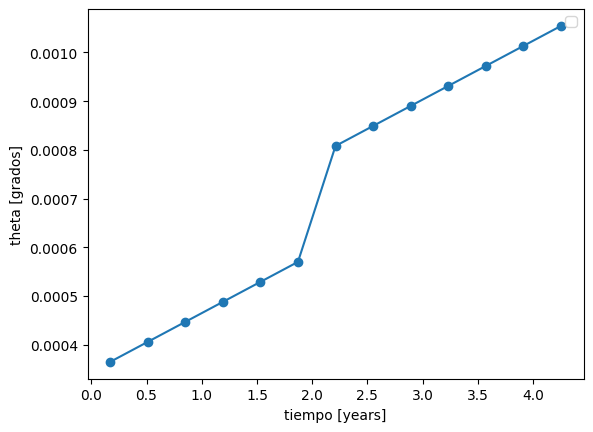

15
15


In [49]:
#periodos = np.array([T_mercurio,T_venus,T_tierra,T_marte,T_jupiter])
##T_cuadrado = periodos**2
#a = np.array([0.307,0.7233,1,1.523679,5.203])
#a_cubo = a**3
factor = 2
x = [elemento * factor for elemento in lista_mercurio]
y = [elemento * factor for elemento in angulitos]
plt.plot(x[0:13],y[0:13],marker='o', linestyle='-')
plt.ylabel('theta [grados]')
plt.xlabel('tiempo [years]')
plt.legend()
plt.show()

print(len(lista_mercurio))
print(len(angulitos))




'\n\n# Calcular la pendiente (m) y la ordenada al origen (b) para la regresión lineal\nm, b = np.polyfit(a_cubo, T_cuadrado, 1)\n\n# Crear la línea de regresión lineal usando los parámetros m y b\nregression_line = m * a_cubo + b\n\n# Graficar los datos de ejemplo y la línea de regresión\n##plt.scatter(x, y, label=\'Datos de ejemplo\')\nplt.plot(a_cubo, regression_line, color=\'blue\', label=\'Regresión Lineal\')\nplt.title(\'Regresión Lineal Simple\')\nplt.xlabel(\'a^3\')\nplt.ylabel(\'T^2\')\nplt.legend()\n\n\nplt.plot(a_cubo,T_cuadrado,\'o\')\nplt.show()\n# Mostrar la gráfica\nprint("4. d")\nplt.show()\n\nprint("La pendiente obtenida es de",round(m,4),"year^2/au^3")\nprint("El punto de corte es de ",round(b,4)," year^2")\n'